<a href="https://colab.research.google.com/github/nroe413/Search-and-Rescue-in-DuckieTown/blob/main/training_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio
!pip install opencv-python-headless  # 'opencv-python-headless' avoids unnecessary GUI dependencies
!pip install matplotlib  # For plotting
!pip install ultralytics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# After mounting, confirm that the image file exists


Mounted at /content/drive


Using cuda device


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-3 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Processed and saved: detected_person_0.83_image_20240503_174042_154574.jpg


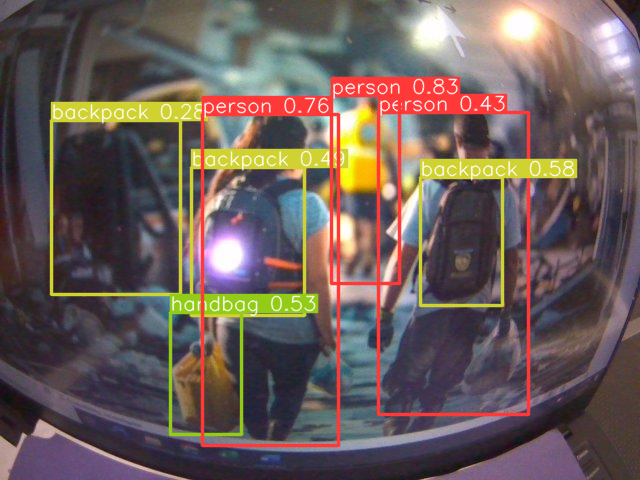

Processed and saved: detected_person_0.82_image_20240503_174035_701585.jpg


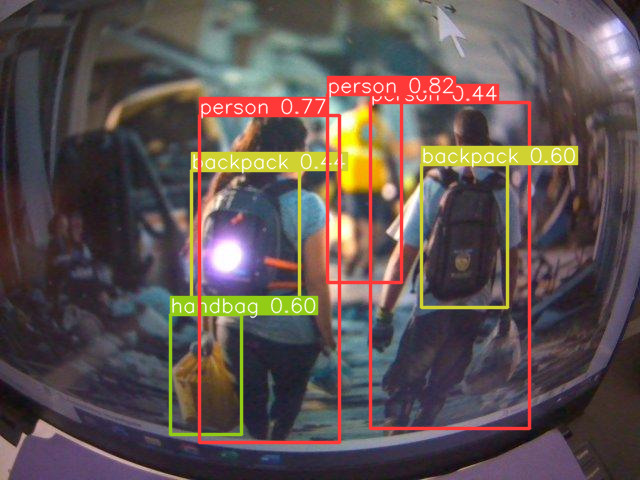

Processed and saved: detected_person_0.79_image_20240503_174043_205515.jpg


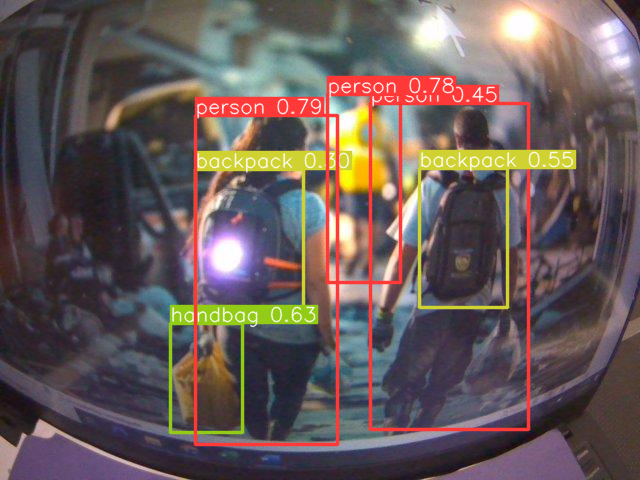

Processed and saved: detected_person_0.80_image_20240503_174037_896606.jpg


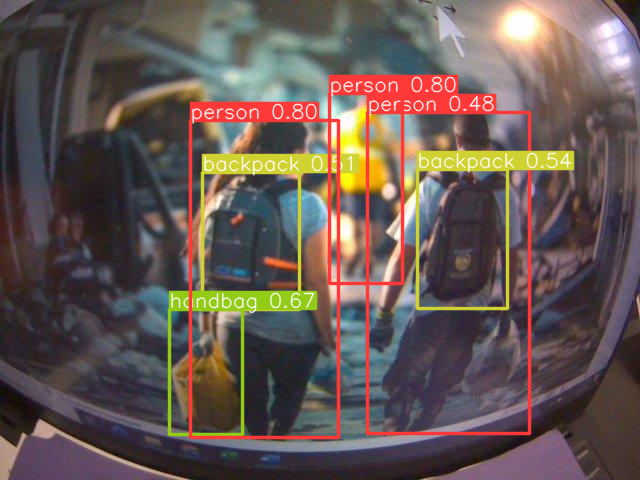

Processed and saved: detected_person_0.81_image_20240503_174036_797763.jpg


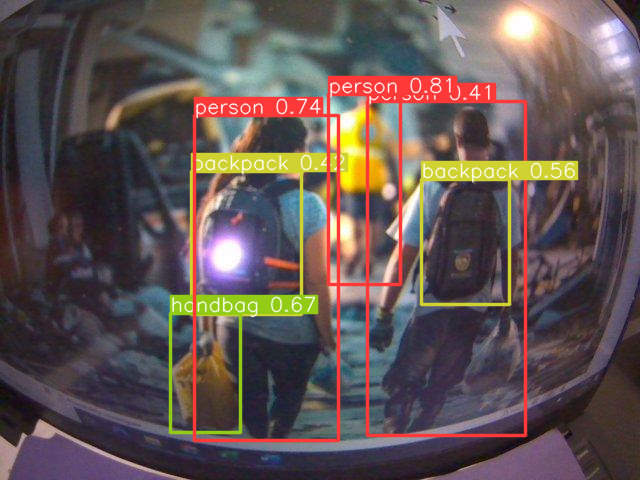

Processed and saved: detected_person_0.82_image_20240503_174040_054879 (1).jpg


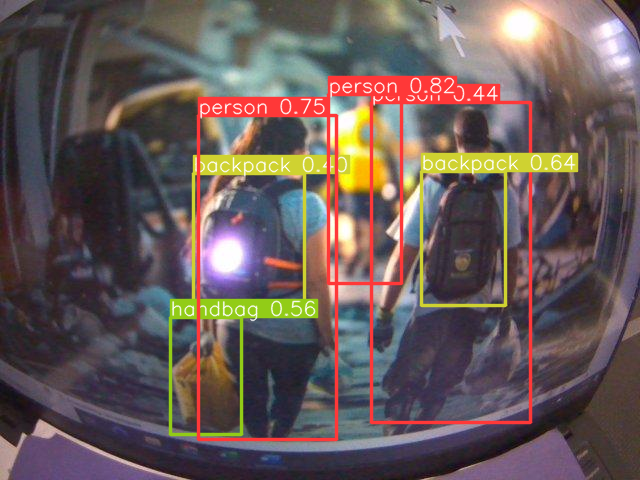

Processed and saved: detected_person_0.81_image_20240503_174044_249665.jpg


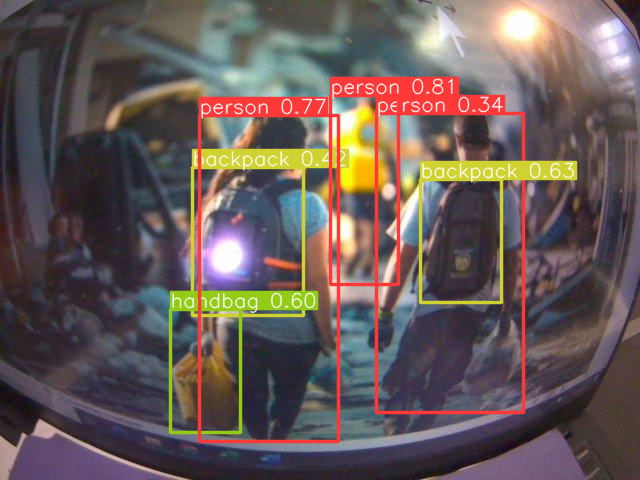

Processed and saved: detected_person_0.79_image_20240503_174034_611983.jpg


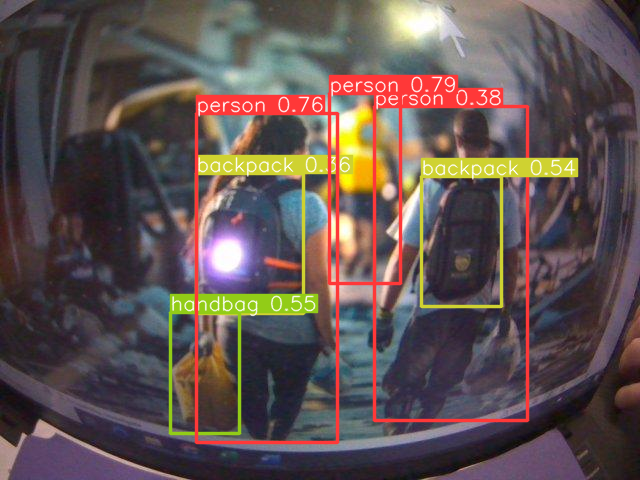

Processed and saved: detected_person_0.83_image_20240503_174042_154574 (1).jpg


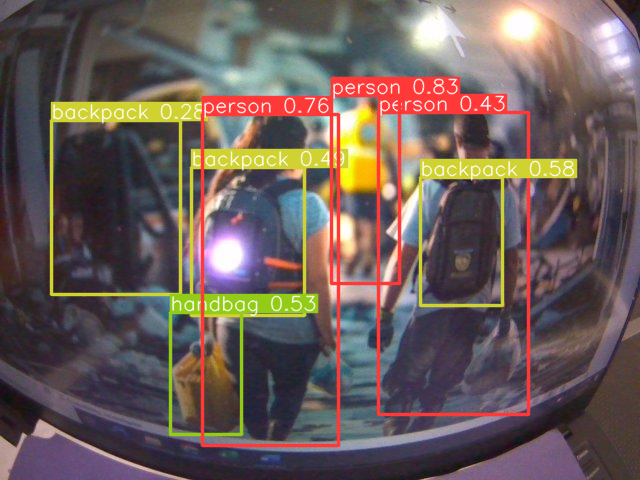

Processed and saved: detected_person_0.83_image_20240503_174041_096748 (1).jpg


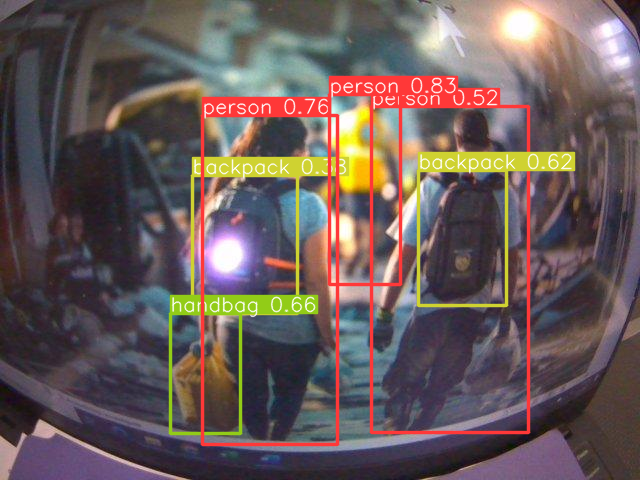

Processed and saved: detected_person_0.83_image_20240503_174038_967162 (1).jpg


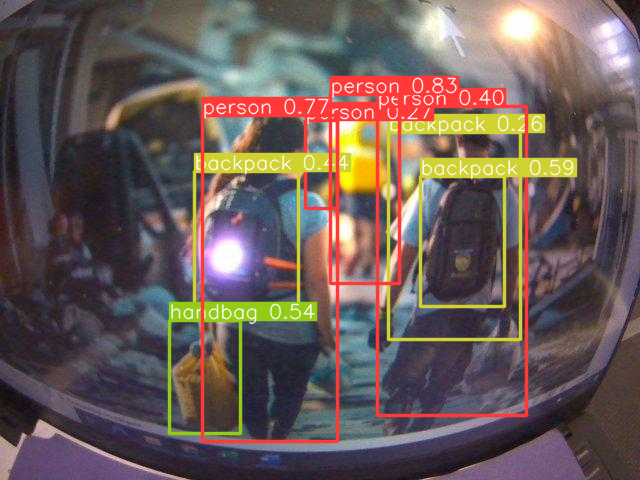

Processed and saved: detected_person_0.81_image_20240503_174036_797763 (1).jpg


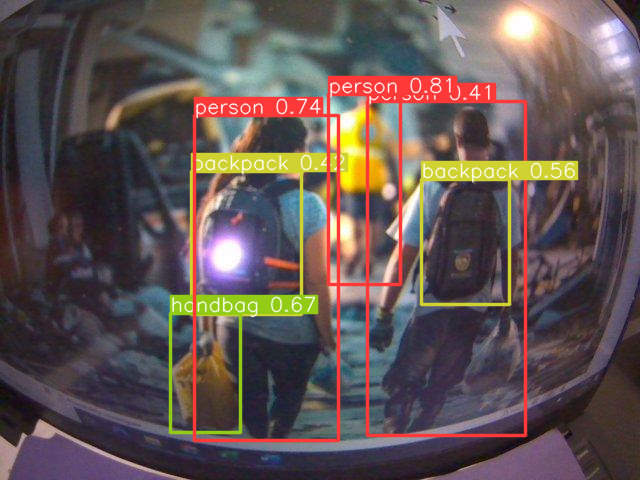

In [10]:
import cv2
import torch
from google.colab.patches import cv2_imshow
import numpy as np
import os

# Ensure CUDA (GPU support) is available if possible
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device} device")

# Load the YOLO model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True).to(device)
model.eval()

# Path to the directory containing images
directory_path = '/content/drive/MyDrive/Colab_Notebooks/uploaded_imgs'
directory_detected_image_path = '/content/drive/MyDrive/Colab_Notebooks/detected_imgs'
# List all image files in the directory
image_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Process each image
for filename in image_files:
    img_path = os.path.join(directory_path, filename)

    # Load an image using OpenCV
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format

    # Perform inference
    results = model(img_rgb)

    # Check for the highest confidence 'person' bounding box
    person_confidences = []
    for *box, conf, cls_id in results.xywh[0]:
        if cls_id == 0:  # Class ID 0 for 'person' in COCO dataset
            person_confidences.append(conf)

    if person_confidences:
        highest_conf = max(person_confidences)
        label_with_conf = f"person_{highest_conf:.2f}"  # Example: person_0.95
    else:
        label_with_conf = "no_person"

    # Convert results to numpy array for OpenCV compatibility and make a copy for drawing
    output_image = np.squeeze(results.render()[0])

    # Save images using OpenCV
    save_path = os.path.join(directory_detected_image_path, f"detected_{label_with_conf}_{filename}")
    cv2.imwrite(save_path, cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))

    # Display the saved image results (optional)
    print(f'Processed and saved: detected_{label_with_conf}_{filename}')
    cv2_imshow(cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))
    cv2.waitKey(100) # Small delay to display images, adjust as needed

# Clean up display windows
cv2.destroyAllWindows()